/var/folders/vd/7gcd_vrj2nb1qm1dm3sczg_h0000gn/T/ipykernel_26040/2839243662.py:11: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.median(), inplace=True)


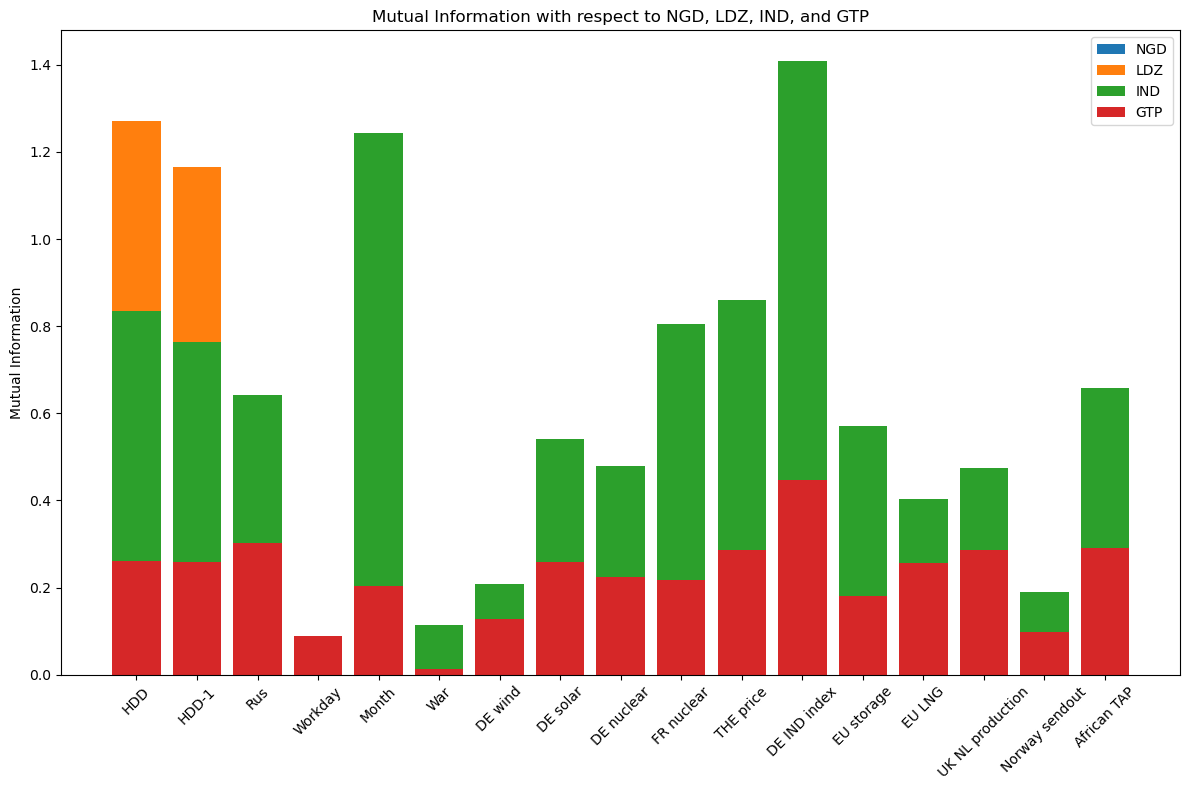

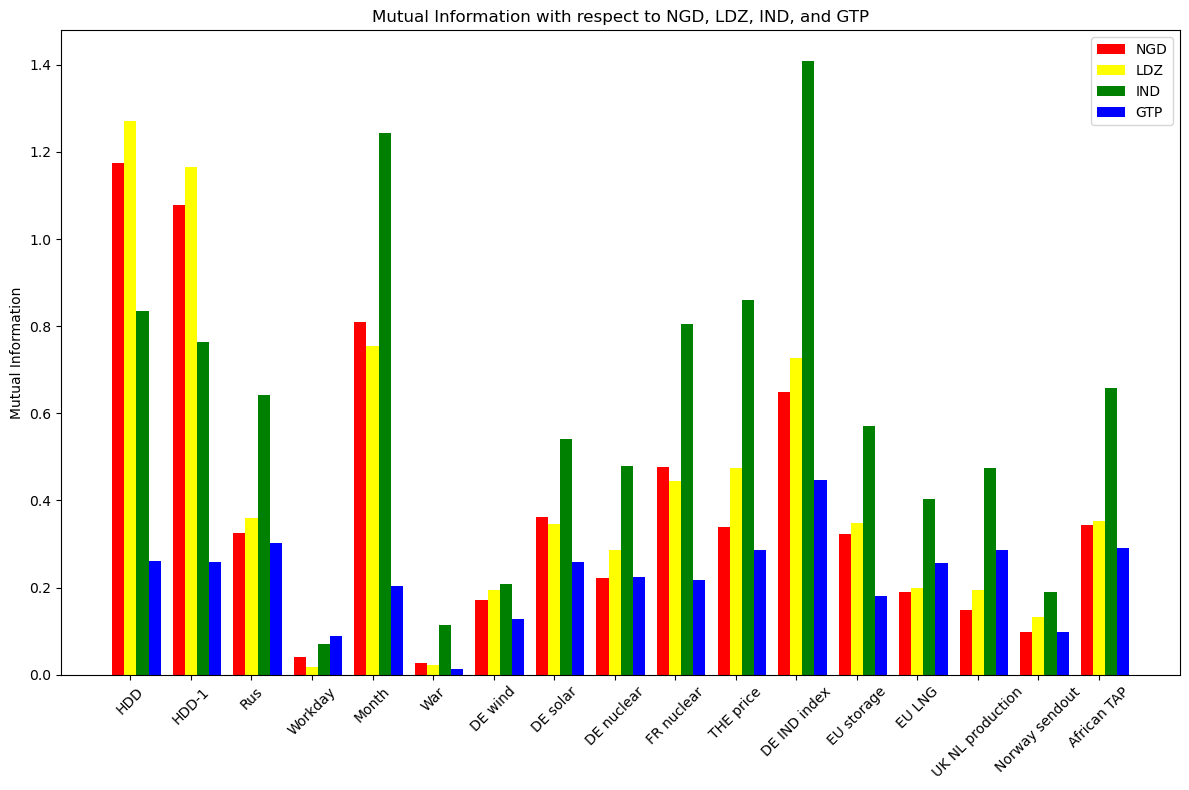

In [1]:
# Mutual Information Analysis
import pandas as pd
import numpy as np
from sklearn.feature_selection import mutual_info_regression
import matplotlib.pyplot as plt

# Step 1: Data Loading & Preprocessing
data = pd.read_csv('daily_NGD.csv', delimiter=',') 

# Handling missing values, you can replace them with the median for simplicity
data.fillna(data.median(), inplace=True)

# Step 2: Mutual Information Analysis

# List of target variables and their corresponding features
targets = ['NGD', 'LDZ', 'IND', 'GTP']
features = ['HDD', 'HDD-1', 'Rus', 'Workday', 'Month', 'War', 'DE wind','DE solar', 'DE nuclear', 'FR nuclear','THE price', 'DE IND index', 'EU storage', 'EU LNG', 'UK NL production', 'Norway sendout', 'African TAP']

# Storing results
mi_results = {}

for target in targets:
    mi_values = mutual_info_regression(data[features], data[target])
    mi_results[target] = mi_values

# Step 3: Results Display

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))

for target, mi_values in mi_results.items():
    ax.bar(features, mi_values, label=target)

ax.set_ylabel('Mutual Information')
ax.set_title('Mutual Information with respect to NGD, LDZ, IND, and GTP')
ax.set_xticks(features)
ax.set_xticklabels(features, rotation=45)
ax.legend()

plt.tight_layout()
plt.show()

# Step 4: Results Display (Using Grouped Bar Chart)

# Calculate bar width and positions
barWidth = 0.2
r1 = np.arange(len(features))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))

ax.bar(r1, mi_results['NGD'], width=barWidth, label='NGD', color='red')
ax.bar(r2, mi_results['LDZ'], width=barWidth, label='LDZ', color='yellow')
ax.bar(r3, mi_results['IND'], width=barWidth, label='IND', color='green')
ax.bar(r4, mi_results['GTP'], width=barWidth, label='GTP', color='blue')  # Added a different color for clarity

ax.set_ylabel('Mutual Information')
ax.set_title('Mutual Information with respect to NGD, LDZ, IND, and GTP')
ax.set_xticks([r + barWidth for r in range(len(features))])
ax.set_xticklabels(features, rotation=45)
ax.legend()

plt.tight_layout()
plt.show()



/var/folders/vd/7gcd_vrj2nb1qm1dm3sczg_h0000gn/T/ipykernel_55687/1402954239.py:10: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.median(), inplace=True)


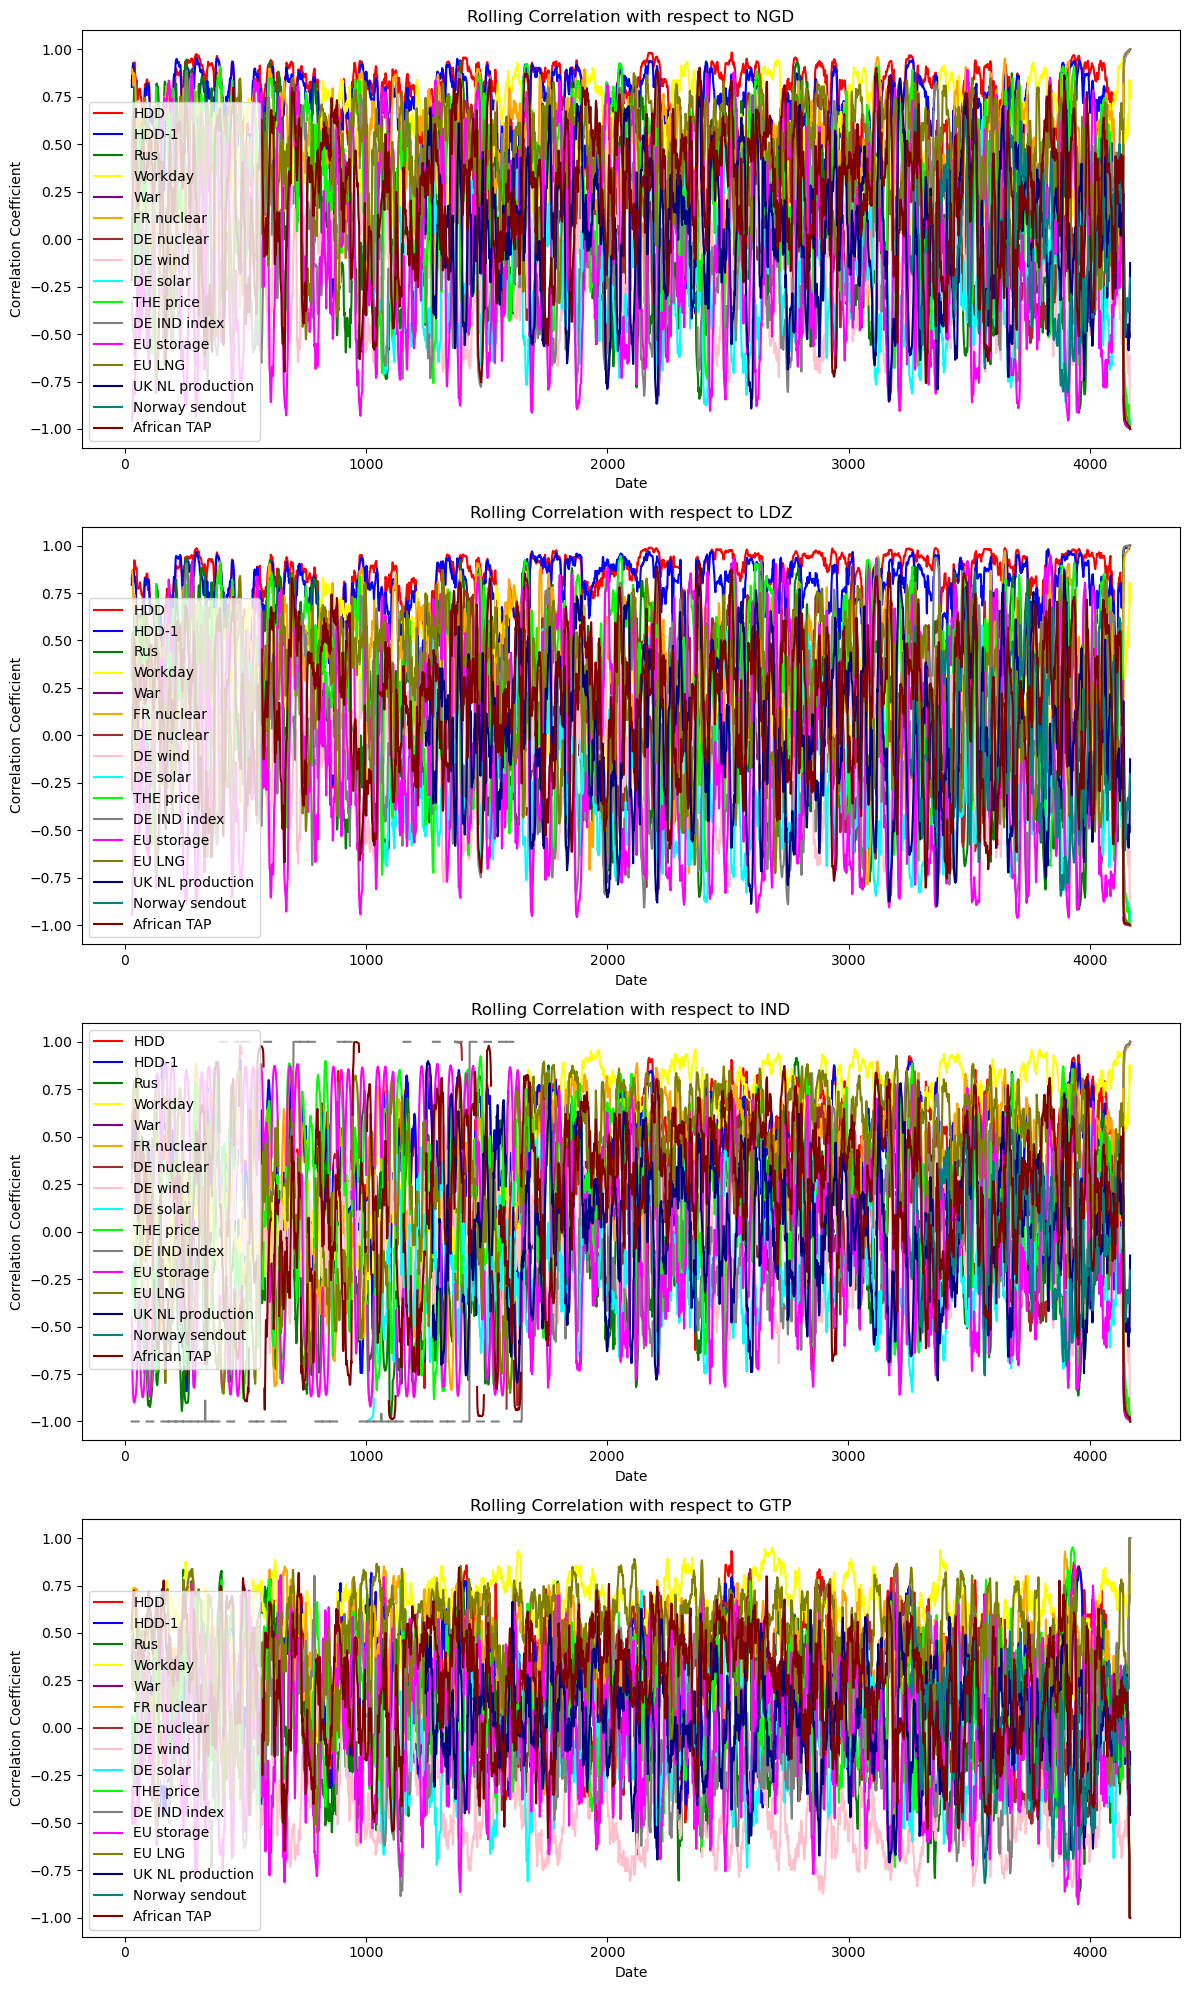

In [17]:
# Rolling Correlation Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Data Loading & Preprocessing
data = pd.read_csv('daily_NGD.csv', delimiter=',') 

# Handling missing values
data.fillna(data.median(), inplace=True)

# Step 2: Rolling Correlation Analysis
window_size = 30  # You can adjust this value based on your dataset and objectives

# Storing results
rolling_corr_results = {}

for target in ['NGD', 'LDZ', 'IND', 'GTP']:
    target_corr = {}
    for feature in ['HDD', 'HDD-1', 'Rus', 'Workday', 'War', 'FR nuclear', 'DE nuclear', 'DE wind', 'DE solar', 'THE price', 'DE IND index', 'EU storage', 'EU LNG', 'UK NL production', 'Norway sendout', 'African TAP']:
        target_corr[feature] = data[target].rolling(window=window_size).corr(data[feature])
    rolling_corr_results[target] = target_corr

# Color palette for the features
color_palette = ['red', 'blue', 'green', 'yellow', 'purple', 'orange', 'brown', 'pink', 'cyan', 'lime', 'gray', 'magenta', 'olive', 'navy', 'teal', 'maroon']

# Step 3: Results Display
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 20))

for ax, (target, correlations) in zip(axes, rolling_corr_results.items()):
    for idx, (feature, corr_series) in enumerate(correlations.items()):
        ax.plot(corr_series, label=feature, color=color_palette[idx])
    ax.set_title(f'Rolling Correlation with respect to {target}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Correlation Coefficient')
    ax.legend()

plt.tight_layout()
plt.show()


In [2]:
# Convert Daily Data to Weekly Average Data
import pandas as pd

# Load the data
ngd_data = pd.read_csv('daily_NGD.csv', delimiter=';')

# Convert 'Date' column to datetime type and set it as the index
ngd_data['Date'] = pd.to_datetime(ngd_data['Date'])
ngd_data.set_index('Date', inplace=True)

# Resample the data to weekly frequency and calculate the mean for each week
weekly_avg_data = ngd_data.resample('W').mean()

# Save the weekly average data to a new CSV file
weekly_avg_data.to_csv('weekly_average_NGD.csv', sep=';')


/var/folders/vd/7gcd_vrj2nb1qm1dm3sczg_h0000gn/T/ipykernel_45170/682726069.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  weekly_avg_data = ngd_data.resample('W').mean()


In [10]:
# Convert daily data to monthly average data
import pandas as pd

# Load the data
ngd_data = pd.read_csv('daily_NGD.csv', delimiter=',')

# Convert 'Date' column to datetime type and set it as the index
ngd_data['Date'] = pd.to_datetime(ngd_data['Date'])
ngd_data.set_index('Date', inplace=True)

# Resample the data to monthly frequency and calculate the mean for each month
monthly_avg_data = ngd_data.resample('M').mean()

# Save the monthly average data to a new CSV file
monthly_avg_data.to_csv('monthly_average_NGD.csv', sep=',')


/var/folders/vd/7gcd_vrj2nb1qm1dm3sczg_h0000gn/T/ipykernel_55687/2361096727.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_avg_data = ngd_data.resample('W').mean()
